### Question: How do the optimum sample sizes $M_z, N_z$ vary across books & authors?

The intuitive definition of "optimum" would seem to imply there is a "strange attractor" at some point in the English (or whatever) language at which any sample corpus of _exactly_ that size exhibits a perfect Zipf distribution. Any corpus of any other size, when sampled, should yield a type-token growth curve parametrizable by this choice of $M_z, N_z$ or something close to it. Taking lots of books (by the same author, then fanning out to multiple authors within the same language) should reveal this strange attractor, a mysterious point in the type-token phase space, around which most fitted models cluster, diffusing slowly.

This is a fantasy, of course. There is no single "point" in phase space, and the optimizing parameters vary quite a lot author-to-author, and even book-to-book. However, the empirical values of $M_z, N_z$ are much more localized than the "raw" token/type counts $M, N$. This does lend credence to the idea of the existence of an "optimum sample" or a "closure of speech" as Zipf called it. Let's attempt to map out that region.

In [1]:
# bloody dependencies
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 8)
from nltk.corpus import gutenberg
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error as MSE

# custom classes
from legomena import Corpus, SPGC

In [2]:
# standard project gutenberg corpus
spgc = SPGC.getMeta()

# for now, restrict study to english-only
spgc = spgc[spgc.language == "['en']"]

# preview
spgc.head()

,title,author,authoryearofbirth,authoryearofdeath,language,downloads,subjects,type
id,,,,,,,,
1,The Declaration of Independence of the United ...,"Jefferson, Thomas",1743.0,1826.0,['en'],604.0,"{'United States -- History -- Revolution, 1775...",Text
2,The United States Bill of Rights: The Ten Orig...,United States,NaN,NaN,['en'],158.0,"{'Civil rights -- United States -- Sources', '...",Text
3,John F. Kennedy's Inaugural Address,"Kennedy, John F. (John Fitzgerald)",1917.0,1963.0,['en'],28.0,{'Presidents -- United States -- Inaugural add...,Text
4,Lincoln's Gettysburg Address: Given November 1...,"Lincoln, Abraham",1809.0,1865.0,['en'],55.0,{'Consecration of cemeteries -- Pennsylvania -...,Text
5,The United States Constitution,United States,NaN,NaN,['en'],226.0,"{'United States. Constitution', 'United States...",Text


In [3]:
# most prolific authors
spgc.groupby(["author"]).size().sort_values().to_frame().tail(25)

,0
author,
"James, Henry",78
"Baum, L. Frank (Lyman Frank)",78
"Trollope, Anthony",81
"Dickens, Charles",84
"Stevenson, Robert Louis",86
"Pepys, Samuel",87
"Hawthorne, Nathaniel",96
"Ballantyne, R. M. (Robert Michael)",97
"Alger, Horatio, Jr.",101


In [4]:
# all melville's work
melville = spgc[spgc.author == "Melville, Herman"]
melville.sort_values("downloads").tail()

,title,author,authoryearofbirth,authoryearofdeath,language,downloads,subjects,type
id,,,,,,,,
2489,"Moby Dick; Or, The Whale","Melville, Herman",1819.0,1891.0,['en'],324.0,"{'Mentally ill -- Fiction', 'Whaling ships -- ...",Text
21816,The Confidence-Man: His Masquerade,"Melville, Herman",1819.0,1891.0,['en'],518.0,"{'Satire', 'Swindlers and swindling -- Fiction...",Text
11231,"Bartleby, the Scrivener: A Story of Wall-Street","Melville, Herman",1819.0,1891.0,['en'],740.0,"{'Young men -- Fiction', 'Copyists -- Fiction'...",Text
15,Moby Dick,"Melville, Herman",1819.0,1891.0,['en'],905.0,"{'Mentally ill -- Fiction', 'Whaling ships -- ...",Text
2701,"Moby Dick; Or, The Whale","Melville, Herman",1819.0,1891.0,['en'],14337.0,"{'Whaling ships -- Fiction', 'Mentally ill -- ...",Text


In [5]:
# moby dick
mobydick = SPGC.get(2701)

Number of tokens (<corpus>.M): 210258
Number of types  (<corpus>.N): 16402
Legomena vector  (<corpus>.k): [   0 7197 2781 1555  872  632  439  338  303]
Frequency distribution accessible as <corpus>.fdist


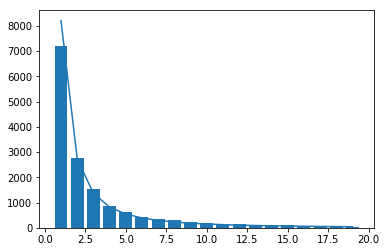

In [6]:
# k-legomena distributions
x = np.arange(1, 20)
plt.bar(x, mobydick.k[x])
plt.plot(x, mobydick.N/x/(x+1))
plt.show()

In [7]:
# load all melville into memory
corpi = {}
for pgid in melville.index.values:
    corpus = SPGC.get(pgid)
    if corpus is None:
        continue
    corpus.buildTTRCurve() # empirical TTR: 100 samples
    corpus.fit(optimize = True) # best fit logarithmic model: M_z,N_z
    corpi[pgid] = corpus

Number of tokens (<corpus>.M): 1352
Number of types  (<corpus>.N): 595
Legomena vector  (<corpus>.k): [  0 448  66  24  14  10   8   5   3]
Frequency distribution accessible as <corpus>.fdist
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z


/home/victor/Documents/GitHub/legomena/src/legomena.py:450: RuntimeWarning: invalid value encountered in log
  func = lambda x : 1./np.log(x) + 1./(1.-x) - h_obs
/home/victor/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Number of tokens (<corpus>.M): 113161
Number of types  (<corpus>.N): 10382
Legomena vector  (<corpus>.k): [   0 4518 1709  914  633  460  278  235  170]
Frequency distribution accessible as <corpus>.fdist
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 210370
Number of types  (<corpus>.N): 16570
Legomena vector  (<corpus>.k): [   0 7278 2796 1591  875  643  447  331  306]
Frequency distribution accessible as <corpus>.fdist
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 11276
Number of types  (<corpus>.N): 2606
Legomena vector  (<corpus>.k): [   0 1686  377  171   68   54   36   26   13]
Frequency distribution accessible as <corpus>.fdist
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 210258
Number of types  (<corpus>.N): 16402
Legomena vector  (<corpus>.

In [8]:
# tabulate (M,N,k1) for all of melville
df = [ (pgid, corpus.M, corpus.N, corpus.M_z, corpus.N_z, corpus.k[1]) for pgid, corpus in corpi.items() ]
df = pd.DataFrame(df, columns = ["id", "tokens", "types", "M_z", "N_z", "hapaxes"])
df = df.set_index("id")
df

,tokens,types,M_z,N_z,hapaxes
id,,,,,
15,1352,595,47207,5683,448
1900,113161,10382,56704,7507,4518
2489,210370,16570,113107,12371,7278
2694,11276,2606,62417,6897,1686
2701,210258,16402,110341,12107,7197
4045,101290,10415,75569,9061,4767
8118,117072,10973,96008,9976,5152
10712,135918,12873,98277,11033,5856
11231,14293,2923,56435,6279,1782


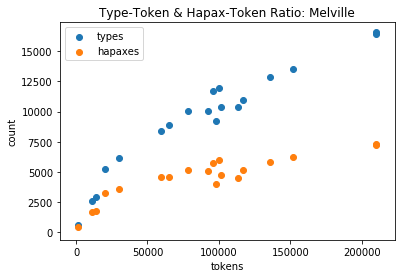

In [9]:
# draw a pretty picture
plt.scatter(df.tokens, df.types, label = "types")
plt.scatter(df.tokens, df.hapaxes, label = "hapaxes")
plt.title("Type-Token & Hapax-Token Ratio: Melville")
plt.xlabel("tokens")
plt.ylabel("count")
plt.legend()
plt.show()

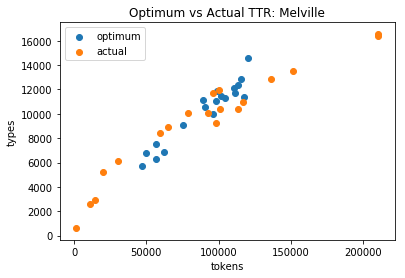

In [10]:
# optimum vs actual
plt.scatter(df.M_z, df.N_z, label = "optimum")
plt.scatter(df.tokens, df.types, label = "actual")
plt.title("Optimum vs Actual TTR: Melville")
plt.xlabel("tokens")
plt.ylabel("types")
plt.legend()
plt.show()

In [11]:
# now a more complete study
authors = ["Zola, Émile", "Stevenson, Robert Louis", "Hawthorne, Nathaniel", "Dickens, Charles", "Dumas, Alexandre", "Verne, Jules", "Twain, Mark", "Shakespeare, William"]
for author in authors:
    print("Working on", author)
    
    # all author's works
    books = spgc[spgc.author == author]
    
    # build & fit each corpus
    for pgid in books.index.values:
        corpus = SPGC.get(pgid)
        if corpus is None:
            continue
    #     corpus.buildTTRCurve() # empirical TTR: 100 samples
        corpus.fit() # best fit logarithmic model: M_z,N_z
        corpi[pgid] = corpus

Working on Zola, Émile
Number of tokens (<corpus>.M): 206100
Number of types  (<corpus>.N): 12161
Legomena vector  (<corpus>.k): [   0 4813 1931 1042  729  489  397  288  213]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 127721
Number of types  (<corpus>.N): 9764
Legomena vector  (<corpus>.k): [   0 3926 1574  922  598  397  286  246  202]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 135329
Number of types  (<corpus>.N): 10479
Legomena vector  (<corpus>.k): [   0 4284 1754  981  622  458  336  246  186]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 70640
Number of types  (<corpus>.N): 6146
Legomena vector  (<corpus>.k): [   0 2570  990  550  320  239  186  164  116]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus

Number of tokens (<corpus>.M): 961
Number of types  (<corpus>.N): 214
Legomena vector  (<corpus>.k): [ 0 63 96 14  9  7  0  0  3]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 134214
Number of types  (<corpus>.N): 8523
Legomena vector  (<corpus>.k): [   0 3561 1332  705  456  362  258  201  146]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 157602
Number of types  (<corpus>.N): 9018
Legomena vector  (<corpus>.k): [   0 3473 1397  762  489  362  253  231  210]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 163231
Number of types  (<corpus>.N): 9872
Legomena vector  (<corpus>.k): [   0 3902 1531  834  559  400  300  228  210]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 206

Number of tokens (<corpus>.M): 94770
Number of types  (<corpus>.N): 10244
Legomena vector  (<corpus>.k): [   0 5131 1734  877  537  338  231  162  145]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 49671
Number of types  (<corpus>.N): 6144
Legomena vector  (<corpus>.k): [   0 3258 1043  481  263  205  131  112   67]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 12951
Number of types  (<corpus>.N): 3479
Legomena vector  (<corpus>.k): [   0 2215  534  238  108   82   62   34   28]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 20388
Number of types  (<corpus>.N): 4007
Legomena vector  (<corpus>.k): [   0 2276  659  303  153  111   80   60   43]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of token

/home/victor/Documents/GitHub/legomena/src/legomena.py:450: RuntimeWarning: invalid value encountered in log
  func = lambda x : 1./np.log(x) + 1./(1.-x) - h_obs
/home/victor/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Number of tokens (<corpus>.M): 98141
Number of types  (<corpus>.N): 10121
Legomena vector  (<corpus>.k): [   0 5452 1596  740  461  340  223  158  115]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 68854
Number of types  (<corpus>.N): 8952
Legomena vector  (<corpus>.k): [   0 4784 1564  713  407  272  180  118   97]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 108305
Number of types  (<corpus>.N): 10043
Legomena vector  (<corpus>.k): [   0 5110 1659  768  514  321  230  165  132]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 74687
Number of types  (<corpus>.N): 7905
Legomena vector  (<corpus>.k): [   0 3772 1358  701  410  294  195  145  129]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tok

Number of tokens (<corpus>.M): 102544
Number of types  (<corpus>.N): 10775
Legomena vector  (<corpus>.k): [   0 5311 1814  940  558  370  260  179  140]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 104975
Number of types  (<corpus>.N): 9587
Legomena vector  (<corpus>.k): [   0 4470 1578  833  527  366  261  186  142]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 118885
Number of types  (<corpus>.N): 10392
Legomena vector  (<corpus>.k): [   0 4935 1738  879  526  344  290  213  155]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 132365
Number of types  (<corpus>.N): 10915
Legomena vector  (<corpus>.k): [   0 5137 1890  941  563  374  284  194  161]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of

Number of tokens (<corpus>.M): 118600
Number of types  (<corpus>.N): 9896
Legomena vector  (<corpus>.k): [   0 4452 1607  876  518  384  299  193  177]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 112526
Number of types  (<corpus>.N): 9556
Legomena vector  (<corpus>.k): [   0 4378 1536  828  483  350  290  183  146]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 231125
Number of types  (<corpus>.N): 13464
Legomena vector  (<corpus>.k): [   0 5534 2076 1105  764  577  406  326  272]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 84216
Number of types  (<corpus>.N): 8198
Legomena vector  (<corpus>.k): [   0 3841 1340  686  448  323  192  163  137]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of to

Number of tokens (<corpus>.M): 4282
Number of types  (<corpus>.N): 1470
Legomena vector  (<corpus>.k): [   0 1066  191   68   29   15   13   13    7]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 4441
Number of types  (<corpus>.N): 1415
Legomena vector  (<corpus>.k): [  0 982 202  51  40  27  18   5   6]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 6759
Number of types  (<corpus>.N): 1965
Legomena vector  (<corpus>.k): [   0 1305  302  106   66   32   15   18   16]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 7058
Number of types  (<corpus>.N): 1941
Legomena vector  (<corpus>.k): [   0 1255  299  121   64   35   22   17   10]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M)

Number of tokens (<corpus>.M): 82516
Number of types  (<corpus>.N): 8279
Legomena vector  (<corpus>.k): [   0 3739 1382  771  478  335  219  178  137]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 6250
Number of types  (<corpus>.N): 1313
Legomena vector  (<corpus>.k): [  0 766 198  84  49  27  25  25  16]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 16085
Number of types  (<corpus>.N): 2991
Legomena vector  (<corpus>.k): [   0 1764  440  209  110   70   55   44   30]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 52412
Number of types  (<corpus>.N): 4985
Legomena vector  (<corpus>.k): [   0 2281  805  418  257  182  127  119   87]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>

Number of tokens (<corpus>.M): 140132
Number of types  (<corpus>.N): 12860
Legomena vector  (<corpus>.k): [   0 5869 2270 1103  670  516  369  241  199]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 18410
Number of types  (<corpus>.N): 3450
Legomena vector  (<corpus>.k): [   0 2071  529  242  116   78   76   34   32]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 255823
Number of types  (<corpus>.N): 12634
Legomena vector  (<corpus>.k): [   0 4783 1888 1160  768  542  431  343  279]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 17217
Number of types  (<corpus>.N): 3478
Legomena vector  (<corpus>.k): [   0 2104  564  244  141   77   50   44   27]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of to

Number of tokens (<corpus>.M): 28394
Number of types  (<corpus>.N): 4162
Legomena vector  (<corpus>.k): [   0 2309  679  338  162  113   76   52   32]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 134678
Number of types  (<corpus>.N): 10075
Legomena vector  (<corpus>.k): [   0 4703 1596  836  537  346  290  214  147]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 132415
Number of types  (<corpus>.N): 9272
Legomena vector  (<corpus>.k): [   0 4195 1512  761  480  355  240  168  166]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 76562
Number of types  (<corpus>.N): 7868
Legomena vector  (<corpus>.k): [   0 3807 1315  636  415  264  174  149  119]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tok

Number of tokens (<corpus>.M): 82368
Number of types  (<corpus>.N): 7580
Legomena vector  (<corpus>.k): [   0 3384 1251  666  432  272  193  177  123]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 12142
Number of types  (<corpus>.N): 2698
Legomena vector  (<corpus>.k): [   0 1571  445  206  110   75   44   50   23]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 90156
Number of types  (<corpus>.N): 7493
Legomena vector  (<corpus>.k): [   0 3337 1172  627  389  260  208  157  135]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 73230
Number of types  (<corpus>.N): 6165
Legomena vector  (<corpus>.k): [   0 2743  985  492  369  237  181  124  107]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens

Number of tokens (<corpus>.M): 30034
Number of types  (<corpus>.N): 3616
Legomena vector  (<corpus>.k): [   0 1840  569  280  178  114   78   58   54]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 78130
Number of types  (<corpus>.N): 8175
Legomena vector  (<corpus>.k): [   0 4145 1283  650  436  295  212  149   99]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 86658
Number of types  (<corpus>.N): 8423
Legomena vector  (<corpus>.k): [   0 4053 1481  680  431  292  225  154  125]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 67286
Number of types  (<corpus>.N): 7412
Legomena vector  (<corpus>.k): [   0 3625 1217  650  383  262  194  121   91]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens

Number of tokens (<corpus>.M): 124538
Number of types  (<corpus>.N): 7708
Legomena vector  (<corpus>.k): [   0 2989 1143  676  440  316  258  170  164]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 17722
Number of types  (<corpus>.N): 2676
Legomena vector  (<corpus>.k): [   0 1429  387  225  124   78   60   46   35]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
"There is no item named 'SPGC-counts-2018-07-18/PG8993_counts.txt' in the archive"
Number of tokens (<corpus>.M): 102070
Number of types  (<corpus>.N): 8667
Legomena vector  (<corpus>.k): [   0 3675 1441  787  517  340  264  210  144]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 46093
Number of types  (<corpus>.N): 5080
Legomena vector  (<corpus>.k): [   0 2442  843  386  269  172  138  100   81]
Frequency distribution acc

Number of tokens (<corpus>.M): 17217
Number of types  (<corpus>.N): 2757
Legomena vector  (<corpus>.k): [   0 1624  388  193   99   70   55   34   30]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 17731
Number of types  (<corpus>.N): 2794
Legomena vector  (<corpus>.k): [   0 1559  452  187  121   66   44   52   25]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 70297
Number of types  (<corpus>.N): 7575
Legomena vector  (<corpus>.k): [   0 3602 1254  651  410  271  182  165  116]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 4394
Number of types  (<corpus>.N): 1034
Legomena vector  (<corpus>.k): [  0 614 153  82  42  27  14  11   7]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>

Number of tokens (<corpus>.M): 31197
Number of types  (<corpus>.N): 4666
Legomena vector  (<corpus>.k): [   0 2541  769  378  211  136   93   76   44]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 11906
Number of types  (<corpus>.N): 2608
Legomena vector  (<corpus>.k): [   0 1583  405  180  107   65   38   32   25]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 269302
Number of types  (<corpus>.N): 14771
Legomena vector  (<corpus>.k): [   0 6213 2321 1263  775  557  428  353  279]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 194991
Number of types  (<corpus>.N): 14508
Legomena vector  (<corpus>.k): [   0 5901 2473 1350  868  551  408  385  264]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of to

Number of tokens (<corpus>.M): 14369
Number of types  (<corpus>.N): 3287
Legomena vector  (<corpus>.k): [   0 1998  541  236  129   81   33   29   32]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 14997
Number of types  (<corpus>.N): 3101
Legomena vector  (<corpus>.k): [   0 1858  487  217  130   81   41   38   25]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 12163
Number of types  (<corpus>.N): 2920
Legomena vector  (<corpus>.k): [   0 1846  447  201   98   53   50   23   15]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 8405
Number of types  (<corpus>.N): 2039
Legomena vector  (<corpus>.k): [   0 1331  287  111   79   36   23   27   24]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens 

Number of tokens (<corpus>.M): 14001
Number of types  (<corpus>.N): 2906
Legomena vector  (<corpus>.k): [   0 1751  460  212  112   55   50   32   34]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 12943
Number of types  (<corpus>.N): 2508
Legomena vector  (<corpus>.k): [   0 1490  393  164  117   55   36   38   20]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 12980
Number of types  (<corpus>.N): 2552
Legomena vector  (<corpus>.k): [   0 1509  404  171  100   58   42   33   35]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 11078
Number of types  (<corpus>.N): 2443
Legomena vector  (<corpus>.k): [   0 1539  367  143   79   60   43   24   21]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens

Number of tokens (<corpus>.M): 7030
Number of types  (<corpus>.N): 1832
Legomena vector  (<corpus>.k): [   0 1195  266   99   62   37   27   23   18]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 37321
Number of types  (<corpus>.N): 4363
Legomena vector  (<corpus>.k): [   0 2285  679  356  220  121  104   69   65]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Working on Shakespeare, William
Number of tokens (<corpus>.M): 947120
Number of types  (<corpus>.N): 24861
Legomena vector  (<corpus>.k): [   0 9483 3385 1948 1315  906  723  564  479]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 17489
Number of types  (<corpus>.N): 3126
Legomena vector  (<corpus>.k): [   0 1805  475  217  133   94   57   41   37]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <c

Number of tokens (<corpus>.M): 18037
Number of types  (<corpus>.N): 3147
Legomena vector  (<corpus>.k): [   0 1843  462  217  119   80   59   32   35]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 25934
Number of types  (<corpus>.N): 3666
Legomena vector  (<corpus>.k): [   0 2090  549  236  148  101   67   54   33]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 28721
Number of types  (<corpus>.N): 3722
Legomena vector  (<corpus>.k): [   0 2082  545  265  161   98   66   50   44]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 19289
Number of types  (<corpus>.N): 3078
Legomena vector  (<corpus>.k): [   0 1724  471  220  123   82   52   54   42]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens

Number of tokens (<corpus>.M): 32329
Number of types  (<corpus>.N): 4463
Legomena vector  (<corpus>.k): [   0 2589  673  308  179  107   94   35   45]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 377
Number of types  (<corpus>.N): 224
Legomena vector  (<corpus>.k): [  0 176  19  10   3   6   5   2   0]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 20919
Number of types  (<corpus>.N): 2922
Legomena vector  (<corpus>.k): [   0 1686  414  173  142   75   62   40   43]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 20878
Number of types  (<corpus>.N): 2884
Legomena vector  (<corpus>.k): [   0 1653  409  179  128   78   61   42   42]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M

Number of tokens (<corpus>.M): 25201
Number of types  (<corpus>.N): 3588
Legomena vector  (<corpus>.k): [   0 1983  544  256  151   98   72   54   46]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 22880
Number of types  (<corpus>.N): 2991
Legomena vector  (<corpus>.k): [   0 1703  425  220  136   65   41   36   35]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 27218
Number of types  (<corpus>.N): 3789
Legomena vector  (<corpus>.k): [   0 2095  571  291  145  109   70   60   48]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 22278
Number of types  (<corpus>.N): 2840
Legomena vector  (<corpus>.k): [   0 1570  413  179  121   87   49   43   39]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens

Number of tokens (<corpus>.M): 25674
Number of types  (<corpus>.N): 3870
Legomena vector  (<corpus>.k): [   0 2256  590  251  136  111   64   60   47]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 21811
Number of types  (<corpus>.N): 3823
Legomena vector  (<corpus>.k): [   0 2217  609  276  148   82   66   44   39]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 22853
Number of types  (<corpus>.N): 3848
Legomena vector  (<corpus>.k): [   0 2168  621  265  142  114   81   56   42]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 25537
Number of types  (<corpus>.N): 4004
Legomena vector  (<corpus>.k): [   0 2325  581  285  149  117   68   50   52]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
"There is no ite

Number of tokens (<corpus>.M): 61286
Number of types  (<corpus>.N): 6978
Legomena vector  (<corpus>.k): [   0 3582 1158  544  344  247  155  106   89]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 124149
Number of types  (<corpus>.N): 8959
Legomena vector  (<corpus>.k): [   0 4127 1376  745  464  317  250  186  124]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 17291
Number of types  (<corpus>.N): 2976
Legomena vector  (<corpus>.k): [   0 1685  442  225  133   70   56   48   32]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 129153
Number of types  (<corpus>.N): 9627
Legomena vector  (<corpus>.k): [   0 4423 1579  787  456  332  238  190  165]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of toke

In [12]:
# tabulate (M,N,M_z,N_z,k1) for all author's works
book_data = [ (pgid, corpus.M, corpus.N, corpus.M_z, corpus.N_z, corpus.k[1]) for pgid, corpus in corpi.items() ]
book_data = pd.DataFrame(book_data, columns = ["id", "tokens", "types", "M_z", "N_z", "hapaxes"])
book_data = book_data.set_index("id")
book_data["author"] = spgc["author"]
book_data.head()

,tokens,types,M_z,N_z,hapaxes,author
id,,,,,,
15,1352,595,47207,5683,448,"Melville, Herman"
1900,113161,10382,56704,7507,4518,"Melville, Herman"
2489,210370,16570,113107,12371,7278,"Melville, Herman"
2694,11276,2606,62417,6897,1686,"Melville, Herman"
2701,210258,16402,110341,12107,7197,"Melville, Herman"


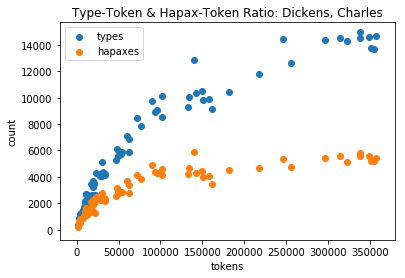

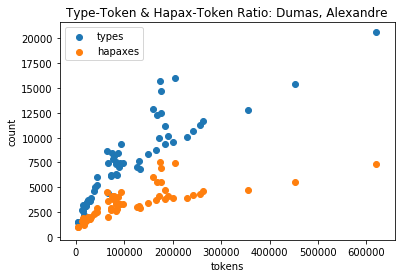

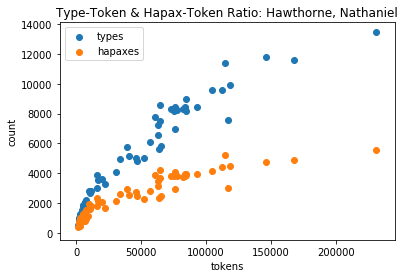

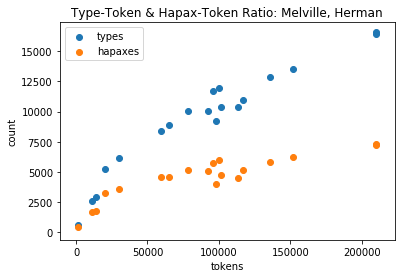

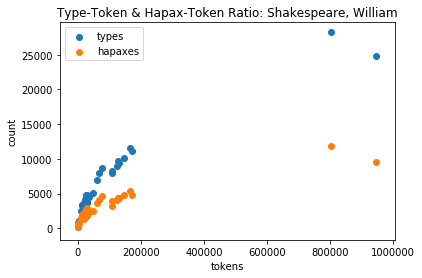

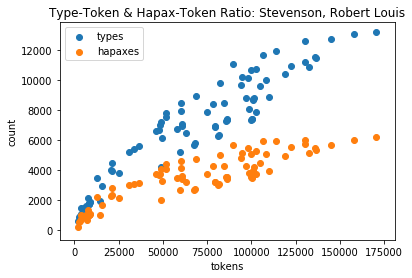

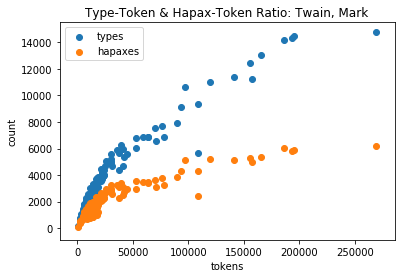

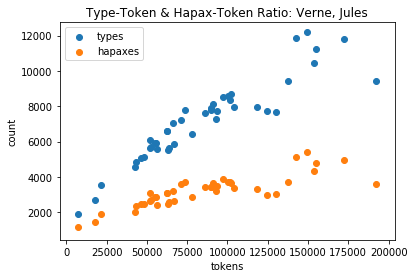

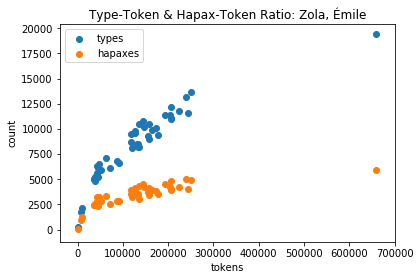

In [13]:
# TTR by author
for author, df in book_data.groupby(["author"]):
    plt.scatter(df.tokens, df.types, label = "types")
    plt.scatter(df.tokens, df.hapaxes, label = "hapaxes")
    plt.title(f"Type-Token & Hapax-Token Ratio: {author}")
    plt.xlabel("tokens")
    plt.ylabel("count")
    plt.legend()
    plt.show()

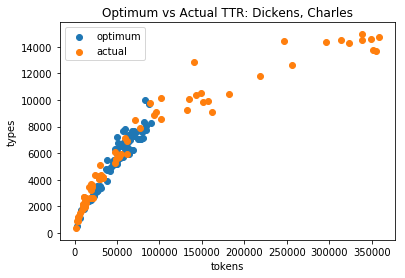

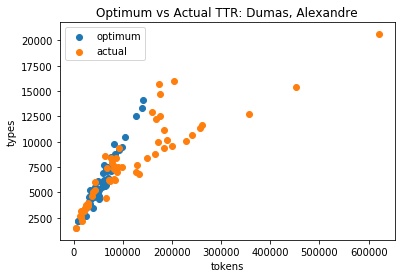

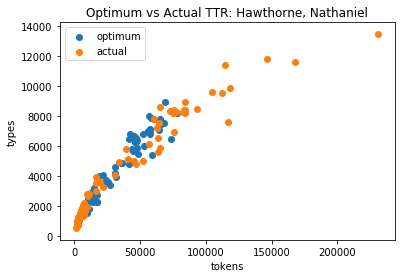

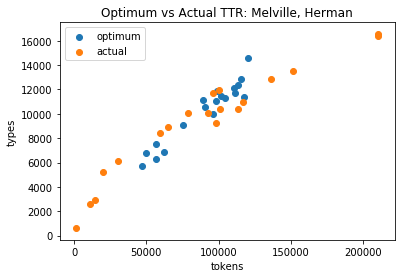

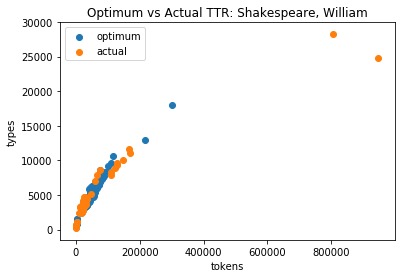

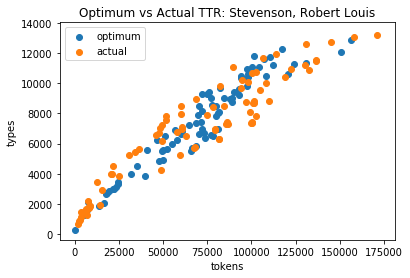

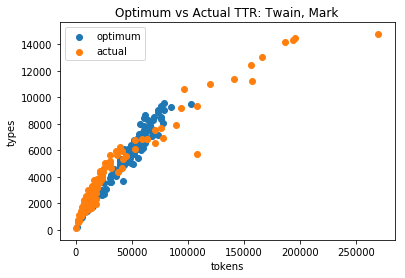

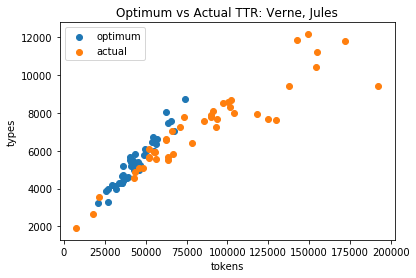

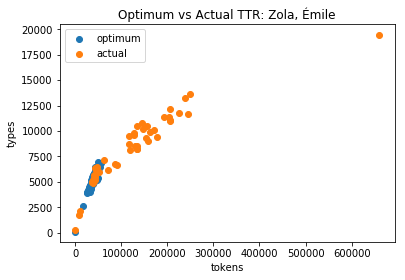

In [14]:
# optimum vs actual per author
for author, df in book_data.groupby(["author"]):
    plt.scatter(df.M_z, df.N_z, label = "optimum")
    plt.scatter(df.tokens, df.types, label = "actual")
    plt.title(f"Optimum vs Actual TTR: {author}")
    plt.xlabel("tokens")
    plt.ylabel("types")
    plt.legend()
    plt.show()

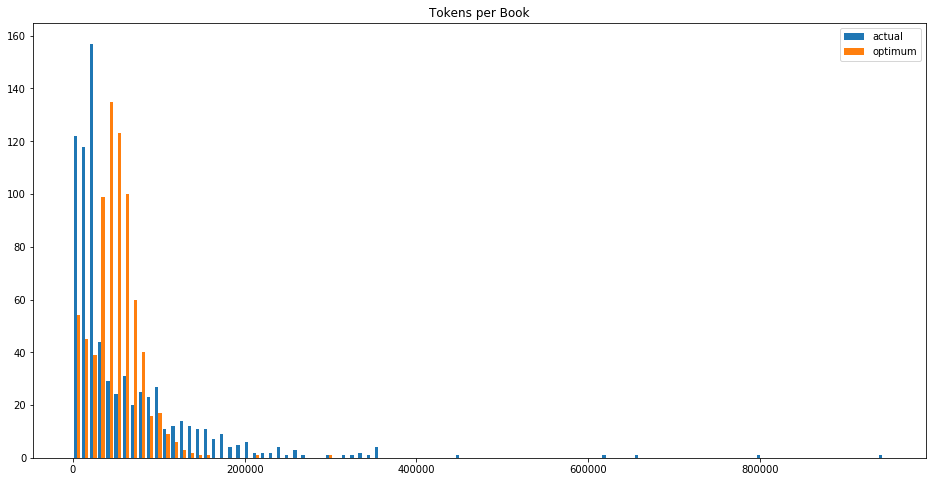

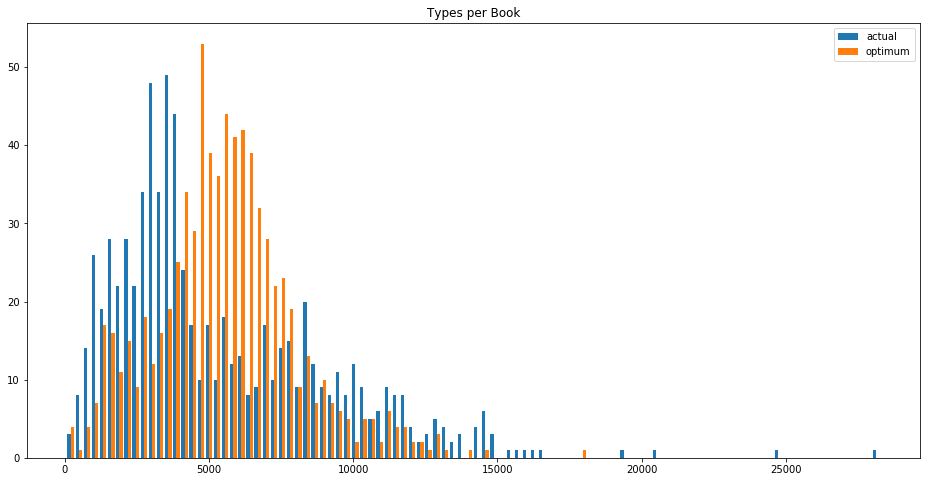

In [24]:
# words per book
plt.hist([book_data.tokens, book_data.M_z], label = ["actual", "optimum"], bins = 100)
plt.title("Tokens per Book")
plt.legend()
plt.show()

# unique words per book
plt.hist([book_data.types, book_data.N_z], label = ["actual", "optimum"], bins = 100)
plt.title("Types per Book")
plt.legend()
plt.show()